In [67]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os

class Ray:
    def __init__(self, init_info, trajectory):
        self.a = init_info['a']
        self.init_theta = init_info['init_theta']
        self.init_vx = init_info['init_vx']
        self.init_vy = init_info['init_vy']

        self.r_trajectory = trajectory['r']
        self.theta_trajectory = trajectory['theta']
        self.phi_trajectory = trajectory['phi']
        return

rays = []
for fname in os.listdir('./../data/'):
    t = {}
    t['r'], t['theta'], t['phi'] = np.loadtxt(
        './../data/' + fname, 
        dtype='float', 
        delimiter=',', 
        unpack=True
    )
    l = re.match('.*_vx(.*)_vy(.*)_a(.*)_theta(.*)', fname)
    i = {}
    i['init_vx'], i['init_vy'], i['a'], i['init_theta'] = l.groups()
    rays.append(Ray(i, t))



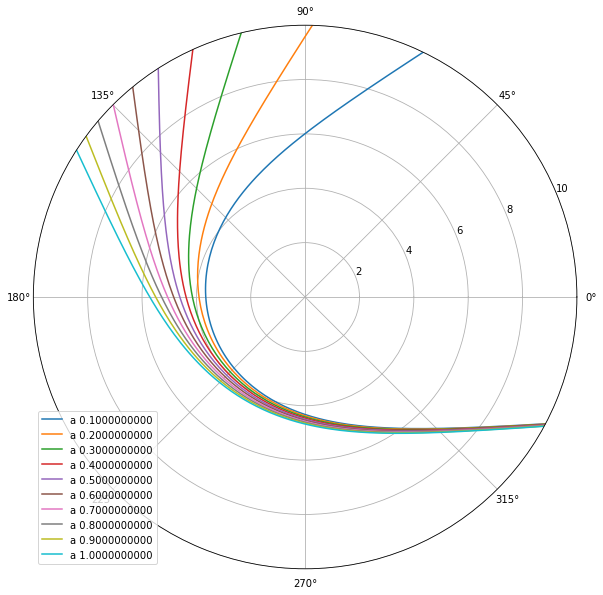

In [73]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'polar'})
fig.set_size_inches(10, 10)
for ray in rays:
    if abs(float(ray.a) - 0) < 1e-5:
        continue
    ax.plot(ray.phi_trajectory, ray.r_trajectory, label=f'a {ray.a}')
ax.set_rlim(0, 10)
ax.legend()